In [1]:
import pandas as pd
import numpy as np
import alienlab.utils
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename

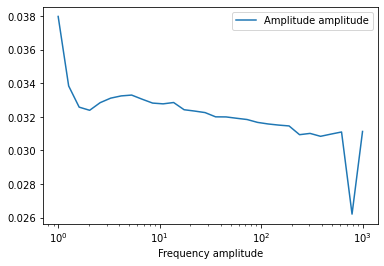

In [2]:
bode_path = askopenfilename()
# Blank file analysis
bode_file = pd.read_csv(bode_path, engine = 'python',
                         sep = ',', dtype = np.float64)
bode_file = bode_file.dropna() #remove unnecessary rows
K = bode_file.keys()
bode_file.plot(K[1], K[2], logx=True)

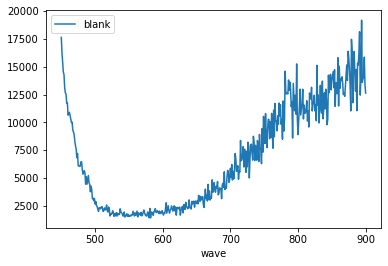

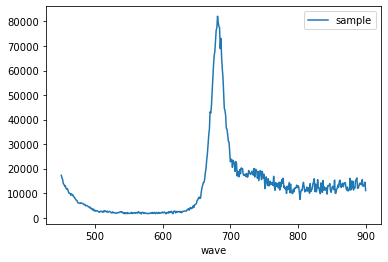

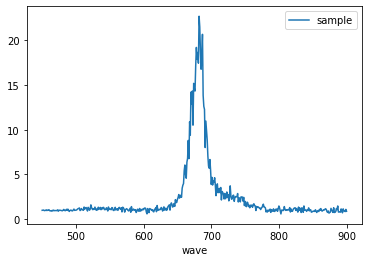

In [3]:

# Blank file analysis
bode_file = pd.read_csv(bode_path, engine = 'python', skiprows=8, skipfooter = 10,
                         sep = '\t', dtype = np.float64)
blank_file = blank_file.dropna() #remove unnecessary rows
blank_file.plot('wave', 'blank')

# Sample file analysis
sample_file = pd.read_csv(sample_path, engine = 'python', skiprows=8, skipfooter = 10,
                         sep = '\t', usecols = [2,3], names = ['wave', 'sample'], dtype = np.float64)
sample_file = sample_file.dropna() #remove unnecessary rows
sample_file.plot('wave', 'sample')


sample_file['sample'] = sample_file['sample'].divide(blank_file['blank'], fill_value = 0)
ax = sample_file.plot('wave', 'sample')
new_path = alienlab.utils.replace_extension(sample_path, '.png')
fig = ax.get_figure()
fig.savefig(new_path, dpi = 200)
